In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px #advanced figures

In [2]:
sales = pd.read_csv('sales.csv', parse_dates=['Date'])# the 'Date' column in the CSV file will be parsed as datetime objects  to perform time-based operations and analysis on the data.
sales.head()#displays first five rows

Date   Day     Month    Year  Customer_Age       Age_Group  \
0  2013-11-26  26.0  November  2013.0          19.0     Youth (<25)   
1  2015-11-26  26.0  November  2015.0          19.0     Youth (<25)   
2  2014-03-23  23.0     March  2014.0          49.0  Adults (35-64)   
3  2016-03-23  23.0     March  2016.0          49.0  Adults (35-64)   
4  2014-05-15  15.0       May  2014.0          47.0  Adults (35-64)   

  Customer_Gender    Country             State Product_Category Sub_Category  \
0               M     Canada  British Columbia      Accessories   Bike Racks   
1               M     Canada  British Columbia      Accessories   Bike Racks   
2               M  Australia   New South Wales      Accessories   Bike Racks   
3               M  Australia   New South Wales      Accessories   Bike Racks   
4               F  Australia   New South Wales      Accessories   Bike Racks   

               Product  Order_Quantity  Unit_Cost  Unit_Price  Profit    Cost  \
0  Hitch Rack - 4-Bike             8.0       45.0       120.0   590.0   360.0   
1  Hitch Rack - 4-Bike             8.0       45.0       120.0   590.0   360.0   
2  Hitch Rack - 4-Bike            23.0       45.0       120.0  1366.0  1035.0   
3  Hitch Rack - 4-Bike            20.0       45.0       120.0  1188.0   900.0   
4  Hitch Rack - 4-Bike             4.0       45.0       120.0   238.0   180.0   

   Revenue  
0    950.0  
1    950.0  
2   2401.0  
3   2088.0  
4    418.0

In [3]:
sales.shape#tells us how many rows and columns we have

(113036, 18)

In [4]:
sales.info()#to get info on entire dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              113036 non-null  object 
 1   Day               62322 non-null   float64
 2   Month             62322 non-null   object 
 3   Year              62322 non-null   float64
 4   Customer_Age      62322 non-null   float64
 5   Age_Group         62322 non-null   object 
 6   Customer_Gender   62322 non-null   object 
 7   Country           62322 non-null   object 
 8   State             62322 non-null   object 
 9   Product_Category  62322 non-null   object 
 10  Sub_Category      62322 non-null   object 
 11  Product           62322 non-null   object 
 12  Order_Quantity    62322 non-null   float64
 13  Unit_Cost         62322 non-null   float64
 14  Unit_Price        62322 non-null   float64
 15  Profit            62322 non-null   float64
 16  Cost              62

In [5]:
sales.describe()#statistical properties

Day          Year  Customer_Age  Order_Quantity     Unit_Cost  \
count  62322.000000  62322.000000  62322.000000    62322.000000  62322.000000   
mean      15.655724   2014.574340     35.989089       15.079811      5.070088   
std        8.805952      1.115569     11.384345        8.726795      7.386322   
min        1.000000   2013.000000     17.000000        1.000000      1.000000   
25%        8.000000   2014.000000     27.000000        7.000000      2.000000   
50%       16.000000   2014.500000     35.000000       15.000000      2.000000   
75%       23.000000   2016.000000     44.000000       23.000000      7.000000   
max       31.000000   2016.000000     87.000000       32.000000     59.000000   

         Unit_Price        Profit          Cost       Revenue  
count  62322.000000  62322.000000  62322.000000  62322.000000  
mean      12.822149     89.205401     70.041847    159.247248  
std       19.844873    137.577824     94.995468    229.130169  
min        2.000000     -5.000000      1.000000      2.000000  
25%        5.000000     15.000000     16.000000     35.000000  
50%        5.000000     41.000000     34.000000     82.000000  
75%       10.000000     85.000000     80.000000    165.000000  
max      159.000000   2214.000000   1350.000000   3564.000000

In [6]:
sales['Unit_Cost'].describe()

count    62322.000000
mean         5.070088
std          7.386322
min          1.000000
25%          2.000000
50%          2.000000
75%          7.000000
max         59.000000
Name: Unit_Cost, dtype: float64

In [7]:
sales['Unit_Cost'].mean()

5.07008760951189

In [8]:
sales['Unit_Cost'].min()

1.0

In [9]:
sales['Unit_Cost'].max()

59.0

<Axes: >

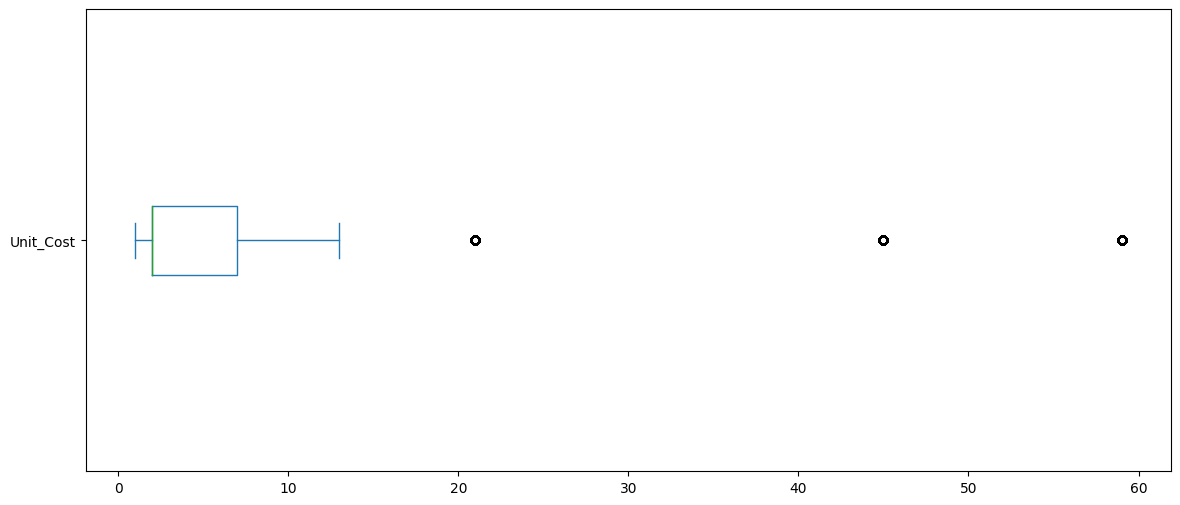

In [10]:
sales['Unit_Cost'].plot(kind='box', vert=False, figsize=(14,6))#boxplot of Unit cost

In [11]:
#plotly boxplot
Unit_cost = sales['Unit_Cost']
fig = px.box(Unit_cost,  orientation='h')
fig.show()

<Axes: ylabel='Density'>

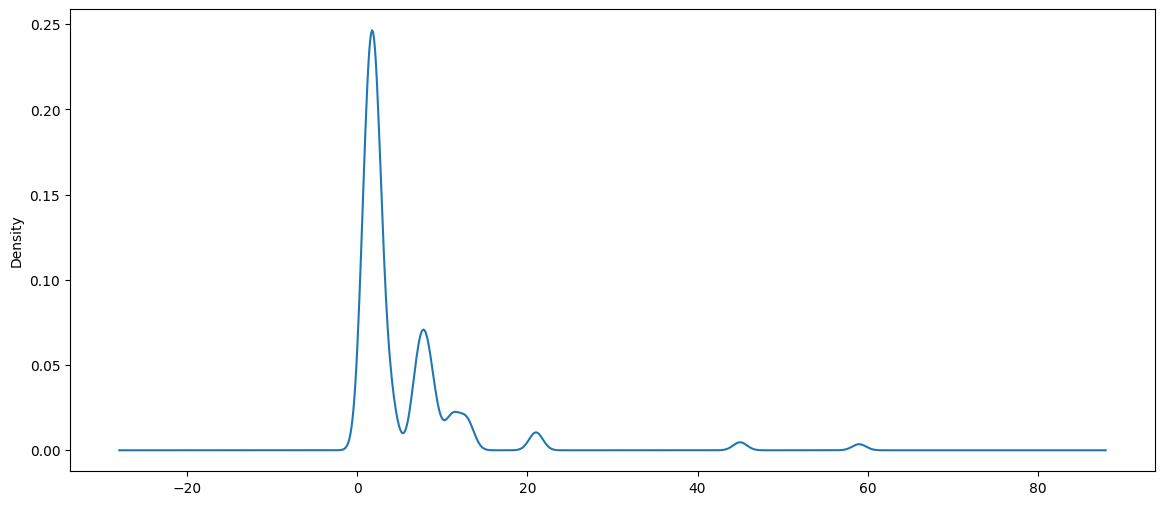

In [12]:
#density plot
sales['Unit_Cost'].plot(kind='density', figsize=(14,6))

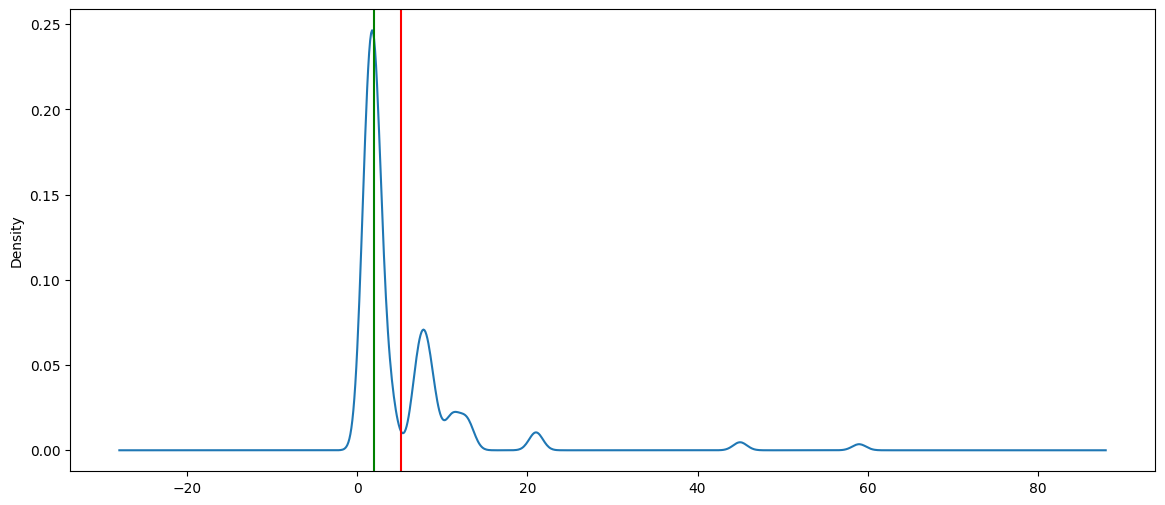

In [13]:
#density plot that points out mean and median
ax = sales['Unit_Cost'].plot(kind='density', figsize=(14,6))
ax.axvline(sales['Unit_Cost'].mean(), color='red')
ax.axvline(sales['Unit_Cost'].median(), color='green')

Text(0.5, 0, 'Dollars')

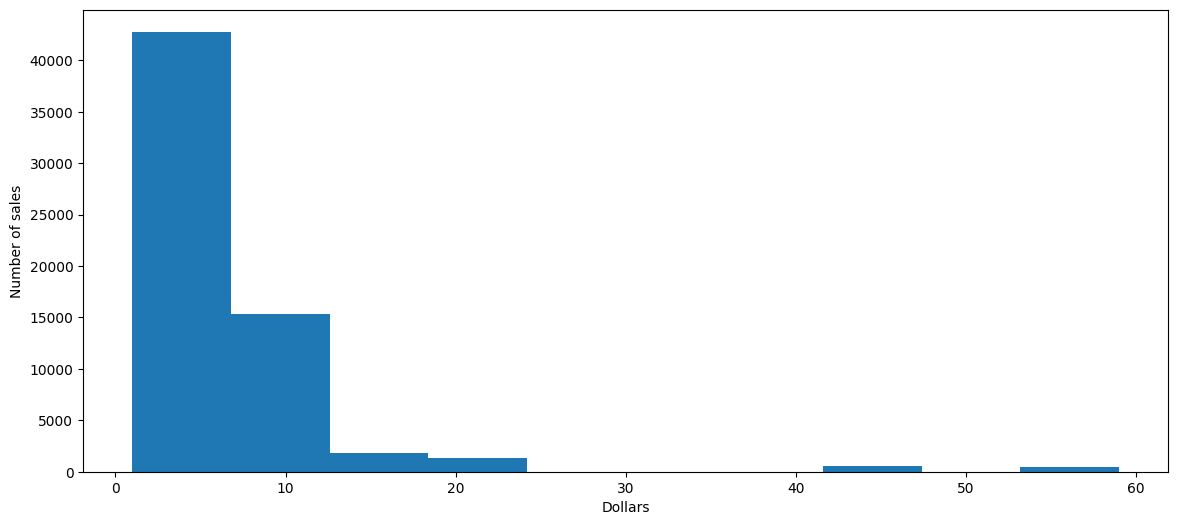

In [14]:
#histogram
ax = sales['Unit_Cost'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('Number of sales')
ax.set_xlabel('Dollars')


Categorical Analysis

In [15]:
sales.head()

Date   Day     Month    Year  Customer_Age       Age_Group  \
0  2013-11-26  26.0  November  2013.0          19.0     Youth (<25)   
1  2015-11-26  26.0  November  2015.0          19.0     Youth (<25)   
2  2014-03-23  23.0     March  2014.0          49.0  Adults (35-64)   
3  2016-03-23  23.0     March  2016.0          49.0  Adults (35-64)   
4  2014-05-15  15.0       May  2014.0          47.0  Adults (35-64)   

  Customer_Gender    Country             State Product_Category Sub_Category  \
0               M     Canada  British Columbia      Accessories   Bike Racks   
1               M     Canada  British Columbia      Accessories   Bike Racks   
2               M  Australia   New South Wales      Accessories   Bike Racks   
3               M  Australia   New South Wales      Accessories   Bike Racks   
4               F  Australia   New South Wales      Accessories   Bike Racks   

               Product  Order_Quantity  Unit_Cost  Unit_Price  Profit    Cost  \
0  Hitch Rack - 4-Bike             8.0       45.0       120.0   590.0   360.0   
1  Hitch Rack - 4-Bike             8.0       45.0       120.0   590.0   360.0   
2  Hitch Rack - 4-Bike            23.0       45.0       120.0  1366.0  1035.0   
3  Hitch Rack - 4-Bike            20.0       45.0       120.0  1188.0   900.0   
4  Hitch Rack - 4-Bike             4.0       45.0       120.0   238.0   180.0   

   Revenue  
0    950.0  
1    950.0  
2   2401.0  
3   2088.0  
4    418.0

In [16]:
sales['Age_Group'].value_counts()

Adults (35-64)          30666
Young Adults (25-34)    20418
Youth (<25)             10740
Seniors (64+)             498
Name: Age_Group, dtype: int64

<Axes: ylabel='Age_Group'>

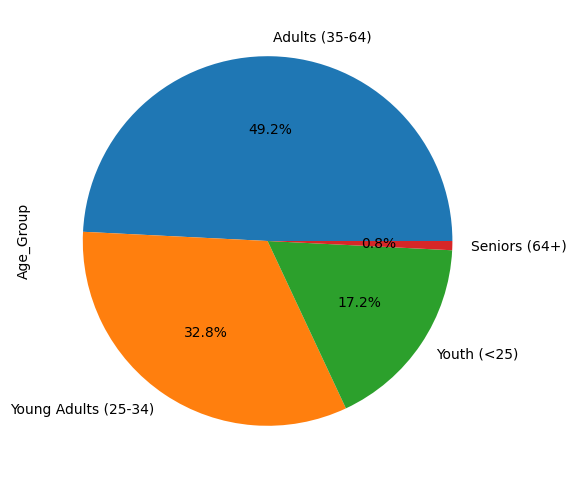

In [23]:

sales['Age_Group'].value_counts().plot(kind='pie', figsize=(6,6),  autopct='%1.1f%%')


<Axes: >

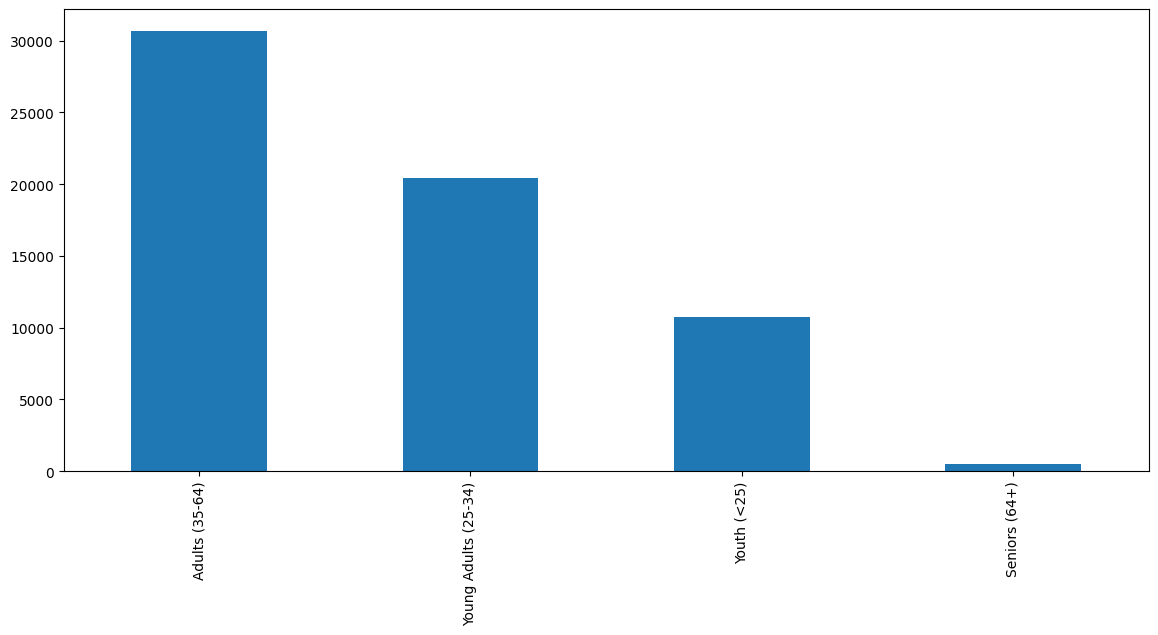

In [18]:
#barchart
sales['Age_Group'].value_counts().plot(kind='bar', figsize=(14,6))

Correlation between the columns<br>
This a measure of the linear association between two variables. It has a value between -1 and 1 where:

1. -1 indicates a perfectly negative linear correlation between two variables
2. 0 indicates no linear correlation between two variables
3. 1 indicates a perfectly positive linear correlation between two variables
The further away the correlation coefficient is from zero, the stronger the relationship between the two variables.

In [19]:
corr = sales.corr()
corr

C:\Users\DENINJO\AppData\Local\Temp\ipykernel_14948\826334997.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Day      Year  Customer_Age  Order_Quantity  Unit_Cost  \
Day             1.000000 -0.006091     -0.015468       -0.003162   0.011838   
Year           -0.006091  1.000000      0.014897       -0.029204  -0.007526   
Customer_Age   -0.015468  0.014897      1.000000        0.008105   0.037940   
Order_Quantity -0.003162 -0.029204      0.008105        1.000000  -0.099509   
Unit_Cost       0.011838 -0.007526      0.037940       -0.099509   1.000000   
Unit_Price      0.011713 -0.008157      0.039602       -0.100961   0.991742   
Profit          0.008559 -0.018134      0.052748        0.314626   0.655543   
Cost            0.009016 -0.018923      0.045889        0.366581   0.679390   
Revenue         0.008877 -0.018734      0.050697        0.340894   0.675281   

                Unit_Price    Profit      Cost   Revenue  
Day               0.011713  0.008559  0.009016  0.008877  
Year             -0.008157 -0.018134 -0.018923 -0.018734  
Customer_Age      0.039602  0.052748  0.045889  0.050697  
Order_Quantity   -0.100961  0.314626  0.366581  0.340894  
Unit_Cost         0.991742  0.655543  0.679390  0.675281  
Unit_Price        1.000000  0.675976  0.666493  0.682202  
Profit            0.675976  1.000000  0.939182  0.989812  
Cost              0.666493  0.939182  1.000000  0.978509  
Revenue           0.682202  0.989812  0.978509  1.000000

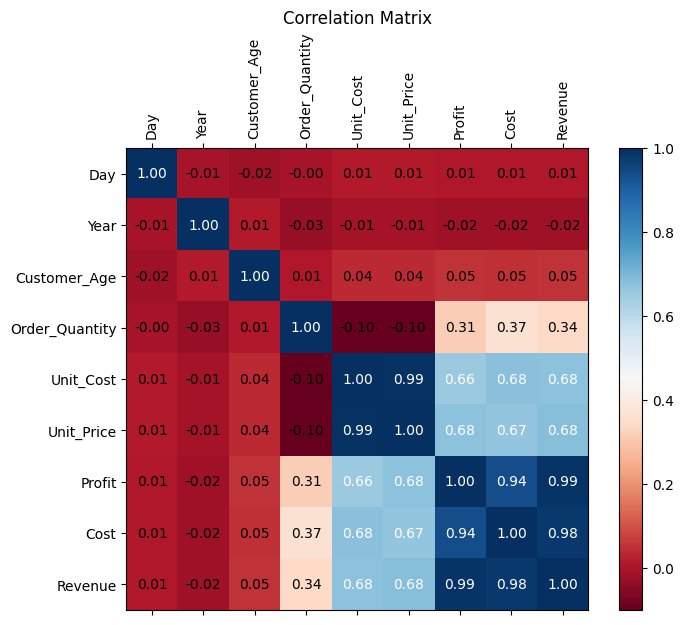

In [20]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap='RdBu')
fig.colorbar(cax)

for (i, j), z in np.ndenumerate(corr):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', color='white' if abs(z) > 0.5 else 'black')

ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation='vertical')
ax.set_yticklabels(corr.columns)

plt.title('Correlation Matrix')
plt.show()
